## Drive & Clone & Unrar

In [2]:
# Connect to Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Install mediapipe library

In [3]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.8/34.8 MB 42.4 MB/s eta 0:00:00


# Import Librarys

In [4]:
import os
import PIL
import shutil
import pandas as pd

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop,Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, ResNet50, MobileNetV2,VGG16,EfficientNetB0
from tensorflow.keras.layers import Input,GRU, Conv2D, MaxPooling2D, Concatenate, Flatten, Dense, Dropout,GlobalAveragePooling2D



In [5]:
# Default Variables
batch_size = 32
img_height = 64 # 64
img_width = 64  # 64

# LR and Dropout
lr = 0.009
dropout_rate = 0.2

input_shape = (img_height, img_width, 3)

class_names = [name for name in os.listdir('/content/gdrive/MyDrive/asl_client_dataset')]
print(f"Total Classes {len(class_names)}")



Total Classes 174


# Function to Plot Train History

In [6]:

def plot_history(history,epochs=500):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs_range = range(epochs)
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.show()


# Copy first 50  images from each class

In [ ]:
counter=0
# Path to the dataset folder
dataset_path = '/content/gdrive/MyDrive/asl_client_dataset'

# Path to the folder where you want to copy the images
output_path = '/content/d'
os.mkdir('d')
# Loop through each folder in the dataset folder
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    subfolder_path=os.path.join(output_path,folder_name)

    os.mkdir(subfolder_path)
    print(counter )
    counter+=1
    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Get the list of images in the folder
        images = os.listdir(folder_path)
        # Copy the first 50 images to the output folder
        for i in range(50):
          image_path = os.path.join(folder_path, images[i])
          shutil.copy(image_path, subfolder_path)


# show some images

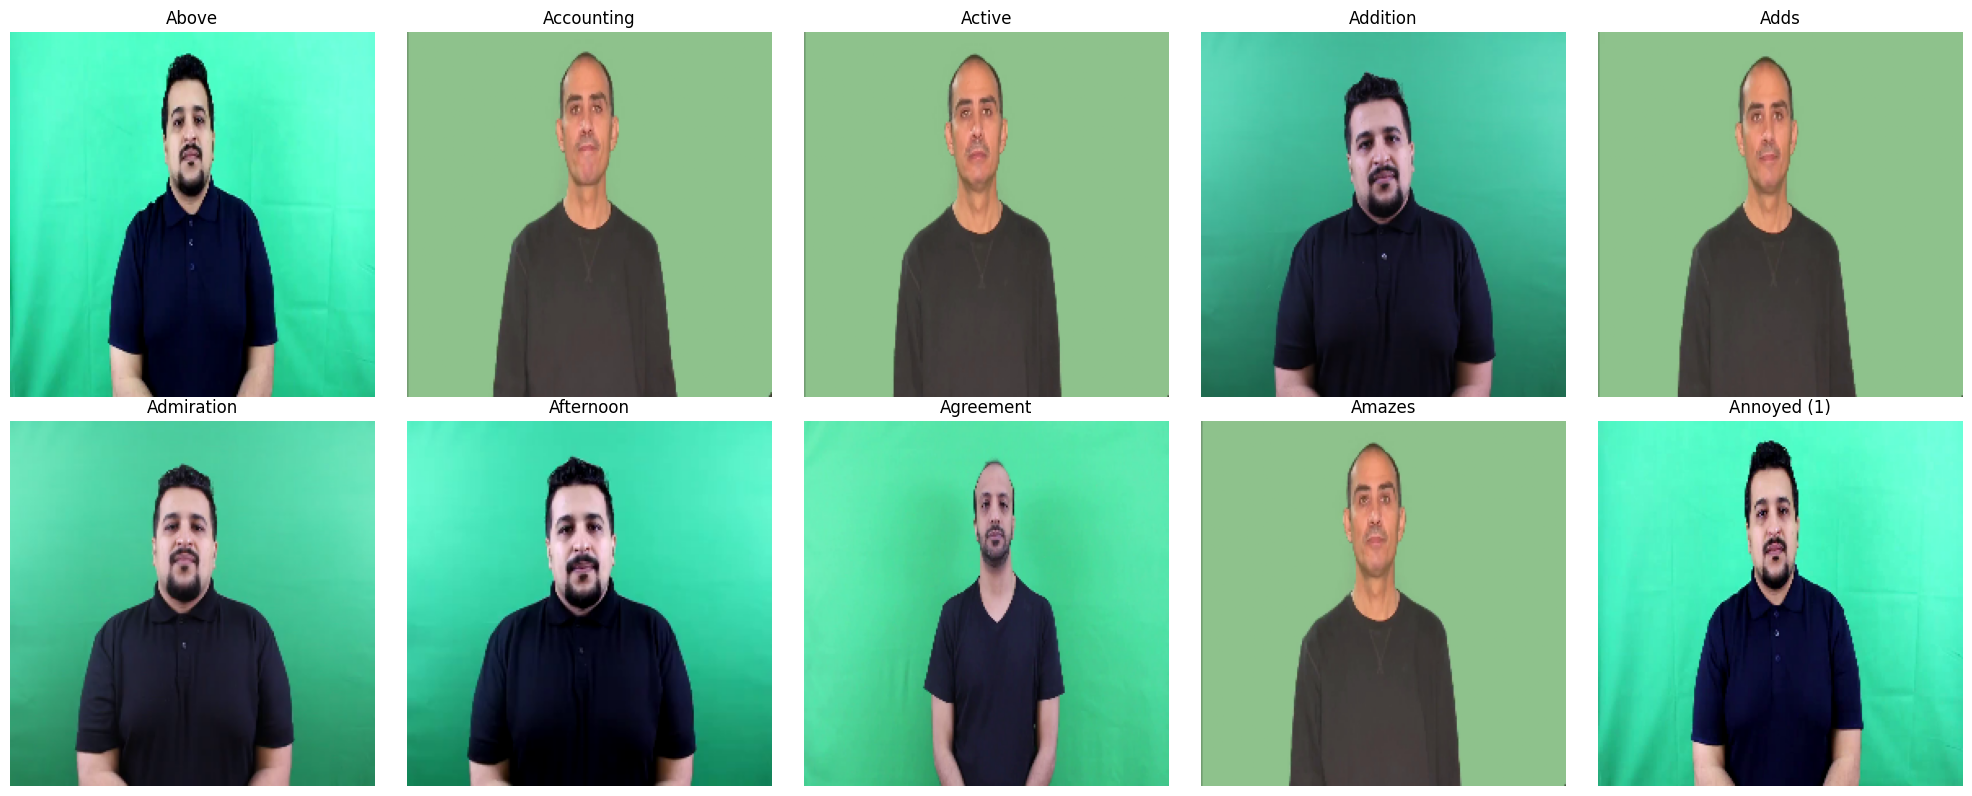

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the folder containing the images
folder_path = '/content/gdrive/MyDrive/asl_client_dataset'

# Get the list of subfolders (classes)
classes = sorted(os.listdir(folder_path))

# Plot the first image in the first 10 classes
plt.figure(figsize=(20, 8))
for i, class_name in enumerate(classes[:10]):
    class_path = os.path.join(folder_path, class_name)
    images = os.listdir(class_path)
    img_path = os.path.join(class_path, images[0])
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Extract th face ,(left,right) hands and Face landmarks from each image

In [ ]:
import cv2
import mediapipe as mp
import os
import pandas as pd

# Load the MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(static_image_mode=True)

# Path to your main folder containing subfolders
main_folder_path = '/content/gdrive/MyDrive/asl_client_dataset'

# List to store the extracted features
features = []
counter=0
counter1=0
# Iterate over the subfolders in the main folder
for subfolder in os.listdir(main_folder_path):
    print(counter)
    counter+=1
    subfolder_path = os.path.join(main_folder_path, subfolder)
    if os.path.isdir(subfolder_path):
        # Iterate over the images in the subfolder
        for filename in os.listdir(subfolder_path):

            if filename.endswith('.png'):
                # Load the image
                image_path = os.path.join(subfolder_path, filename)
                image = cv2.imread(image_path)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Process the image with the MediaPipe Holistic model
                results = holistic.process(image_rgb)

                # Extract facial features, pose landmarks, and hand landmarks
                if results.face_landmarks:
                    face_landmarks = [landmark.x for landmark in results.face_landmarks.landmark]
                else:
                    face_landmarks = [0] * 468  # If no face landmarks detected, use zeros

                if results.pose_landmarks:
                    pose_landmarks = [landmark.x for landmark in results.pose_landmarks.landmark]
                else:
                    pose_landmarks = [0] * 33  # If no pose landmarks detected, use zeros

                if results.left_hand_landmarks:
                    left_hand_landmarks = [landmark.x for landmark in results.left_hand_landmarks.landmark]
                else:
                    left_hand_landmarks = [0] * 21  # If no left hand landmarks detected, use zeros

                if results.right_hand_landmarks:
                    right_hand_landmarks = [landmark.x for landmark in results.right_hand_landmarks.landmark]
                else:
                    right_hand_landmarks = [0] * 21  # If no right hand landmarks detected, use zeros

                # Store the extracted features
                features.append({
                    'filename': filename,
                    'subfolder': subfolder,
                    'face_landmarks': face_landmarks,
                    'pose_landmarks': pose_landmarks,
                    'left_hand_landmarks': left_hand_landmarks,
                    'right_hand_landmarks': right_hand_landmarks
                })




*italicized text*# Convert the features list to a DataFrame

In [13]:
df = pd.DataFrame(features)

# Save the DataFrame to a pickl file


In [14]:
df.to_pickle('asl_landmarks.pkl')

# Release resources

In [ ]:
holistic.close()

# read the data from pickl file

In [7]:
df = pd.read_pickle('/content/gdrive/MyDrive/asl_landmarks.pkl')

In [8]:
df.head()

,filename,subfolder,face_landmarks,pose_landmarks,left_hand_landmarks,right_hand_landmarks
0,25.png,News,"[0.5167853832244873, 0.5138649940490723, 0.515...","[0.5257177352905273, 0.5443427562713623, 0.555...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,26.png,News,"[0.5171927213668823, 0.5157039761543274, 0.516...","[0.5269301533699036, 0.5445324778556824, 0.555...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,27.png,News,"[0.5185508131980896, 0.5180432796478271, 0.518...","[0.5265355110168457, 0.5442528128623962, 0.554...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,28.png,News,"[0.5193772912025452, 0.5197213888168335, 0.519...","[0.5244090557098389, 0.5427693128585815, 0.553...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,29.png,News,"[0.5177680850028992, 0.5164494514465332, 0.517...","[0.5238819718360901, 0.5427224636077881, 0.553...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# combine data

In [8]:
df['all_future']=df.face_landmarks+	df.pose_landmarks	+df.left_hand_landmarks	+df.right_hand_landmarks


# make it as numpy array

In [28]:
X= np.asarray(df['all_future'])
X = np.array(X.tolist())
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data set and convert label from categorical to numerical  data

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = train_test_split(X, df['subfolder'], test_size=0.2, random_state=42)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target classes (y_train and y_test)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Make the model


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have 174 classes
num_classes = 174

model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape=(1, 543)))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 128)            258432    
                                                                 
 gru_1 (GRU)                 (None, 1, 128)            99072     
                                                                 
 gru_2 (GRU)                 (None, 1, 64)             37248     
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 174)               5742      
                                                                 
Total params: 412910 (1.58 MB)
Trainable params: 412910 (1.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:



# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, df['subfolder'], test_size=0.2, random_state=42)

# Train the model

# Train model

In [17]:
filepath       = "/content/asl/Adam/cp-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=700, batch_size=32,callbacks=callbacks_list)


Epoch 1/700
218/218 [==============================] - ETA: 0s - loss: 5.1158 - accuracy: 0.0068
Epoch 1: val_accuracy improved from -inf to 0.00920, saving model to /content/asl/Adam/cp-01-0.01.hdf5
218/218 [==============================] - 12s 15ms/step - loss: 5.1158 - accuracy: 0.0068 - val_loss: 4.9691 - val_accuracy: 0.0092
Epoch 2/700
 15/218 [=>............................] - ETA: 1s - loss: 4.9601 - accuracy: 0.0063    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


214/218 [============================>.] - ETA: 0s - loss: 4.9446 - accuracy: 0.0082
Epoch 2: val_accuracy did not improve from 0.00920
218/218 [==============================] - 2s 9ms/step - loss: 4.9435 - accuracy: 0.0083 - val_loss: 4.8990 - val_accuracy: 0.0063
Epoch 3/700
215/218 [============================>.] - ETA: 0s - loss: 4.8671 - accuracy: 0.0137
Epoch 3: val_accuracy improved from 0.00920 to 0.01667, saving model to /content/asl/Adam/cp-03-0.02.hdf5
218/218 [==============================] - 3s 12ms/step - loss: 4.8676 - accuracy: 0.0138 - val_loss: 4.8332 - val_accuracy: 0.0167
Epoch 4/700
214/218 [============================>.] - ETA: 0s - loss: 4.8025 - accuracy: 0.0171
Epoch 4: val_accuracy improved from 0.01667 to 0.02069, saving model to /content/asl/Adam/cp-04-0.02.hdf5
218/218 [==============================] - 2s 11ms/step - loss: 4.8012 - accuracy: 0.0170 - val_loss: 4.7667 - val_accuracy: 0.0207
Epoch 5/700
215/218 [============================>.] - ETA: 0s 

# Train the model with deferent batch size 64

In [13]:
filepath       = "/content/asl/Adam/cp-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=700, batch_size=64,callbacks=callbacks_list)


Epoch 1/700
196/196 [==============================] - ETA: 0s - loss: 5.1317 - accuracy: 0.0114
Epoch 1: val_accuracy improved from -inf to 0.01120, saving model to /content/asl/Adam/cp-01-0.01.hdf5
196/196 [==============================] - 9s 19ms/step - loss: 5.1317 - accuracy: 0.0114 - val_loss: 5.1099 - val_accuracy: 0.0112
Epoch 2/700
  6/196 [..............................] - ETA: 2s - loss: 5.0993 - accuracy: 0.0078    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


191/196 [============================>.] - ETA: 0s - loss: 5.0160 - accuracy: 0.0176
Epoch 2: val_accuracy improved from 0.01120 to 0.01825, saving model to /content/asl/Adam/cp-02-0.02.hdf5
196/196 [==============================] - 2s 9ms/step - loss: 5.0135 - accuracy: 0.0175 - val_loss: 4.9346 - val_accuracy: 0.0182
Epoch 3/700
194/196 [============================>.] - ETA: 0s - loss: 4.8835 - accuracy: 0.0238
Epoch 3: val_accuracy improved from 0.01825 to 0.02273, saving model to /content/asl/Adam/cp-03-0.02.hdf5
196/196 [==============================] - 2s 9ms/step - loss: 4.8828 - accuracy: 0.0238 - val_loss: 4.8758 - val_accuracy: 0.0227
Epoch 4/700
193/196 [============================>.] - ETA: 0s - loss: 4.7976 - accuracy: 0.0256
Epoch 4: val_accuracy improved from 0.02273 to 0.02561, saving model to /content/asl/Adam/cp-04-0.03.hdf5
196/196 [==============================] - 2s 8ms/step - loss: 4.7974 - accuracy: 0.0254 - val_loss: 4.7500 - val_accuracy: 0.0256
Epoch 5/70

# Make another model

In [14]:
num_classes = 174

model = Sequential()
model.add(GRU(256, return_sequences=True, input_shape=(1, 543)))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 1, 256)            615168    
                                                                 
 gru_4 (GRU)                 (None, 1, 128)            148224    
                                                                 
 gru_5 (GRU)                 (None, 1, 64)             37248     
                                                                 
 gru_6 (GRU)                 (None, 1, 32)             9408      
                                                                 
 gru_7 (GRU)                 (None, 16)                2400      
                                                                 
 dense_1 (Dense)             (None, 512)               8704      
                                                                 
 dense_2 (Dense)             (None, 256)              

In [15]:
filepath       = "/content/asl/Adam2/cp-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=700, batch_size=32,callbacks=callbacks_list)


Epoch 1/700
390/391 [============================>.] - ETA: 0s - loss: 5.1284 - accuracy: 0.0122
Epoch 1: val_accuracy improved from -inf to 0.01184, saving model to /content/asl/Adam2/cp-01-0.01.hdf5
391/391 [==============================] - 14s 15ms/step - loss: 5.1284 - accuracy: 0.0122 - val_loss: 5.1068 - val_accuracy: 0.0118
Epoch 2/700
391/391 [==============================] - ETA: 0s - loss: 5.1055 - accuracy: 0.0144
Epoch 2: val_accuracy improved from 0.01184 to 0.01280, saving model to /content/asl/Adam2/cp-02-0.01.hdf5
391/391 [==============================] - 4s 10ms/step - loss: 5.1055 - accuracy: 0.0144 - val_loss: 5.0980 - val_accuracy: 0.0128
Epoch 3/700
386/391 [============================>.] - ETA: 0s - loss: 5.1017 - accuracy: 0.0124
Epoch 3: val_accuracy did not improve from 0.01280
391/391 [==============================] - 4s 10ms/step - loss: 5.1017 - accuracy: 0.0125 - val_loss: 5.0964 - val_accuracy: 0.0115
Epoch 4/700
389/391 [============================>

# Try another model

In [17]:
num_classes = 174

model = Sequential()
model.add(GRU(256, return_sequences=True, input_shape=(1, 543)))
model.add(GRU(128 ))

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

filepath       = "/content/asl/Adam3/cp-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=700, batch_size=128,callbacks=callbacks_list)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 1, 256)            615168    
                                                                 
 gru_11 (GRU)                (None, 128)               148224    
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 174)               44718     
                                                                 
Total params: 841134 (3.21 MB)
Trainable params: 841134 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/700
93/98 [===========================>..] - ETA: 0s - loss: 5.0900 - accuracy: 0.0139
Epoch 1: val_accuracy improved from -inf to 0.01953, sa

# try another model with difrent unit numbers 33

In [44]:
num_classes = 174

model = Sequential()
model.add(GRU(33, input_shape=(1, 543)))

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

filepath       = "/content/asl1/Adam4/cp-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=2000, batch_size=128,callbacks=callbacks_list)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 33)                57222     
                                                                 
 dense_14 (Dense)            (None, 256)               8704      
                                                                 
 dense_15 (Dense)            (None, 174)               44718     
                                                                 
Total params: 110644 (432.20 KB)
Trainable params: 110644 (432.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
91/98 [==========================>...] - ETA: 0s - loss: 5.0900 - accuracy: 0.0130
Epoch 1: val_accuracy improved from -inf to 0.02241, saving model to /content/asl1/Adam4/cp-01-0.02.hdf5
98/98 [==============================] - 3s 10ms/step - loss: 5.0828 - accura

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
Epoch 751/2000
90/98 [==========================>...] - ETA: 0s - loss: 0.3733 - accuracy: 0.8688
Epoch 751: val_accuracy did not improve from 0.82843
98/98 [==============================] - 1s 6ms/step - loss: 0.3707 - accuracy: 0.8700 - val_loss: 0.7777 - val_accuracy: 0.8236
Epoch 752/2000
92/98 [===========================>..] - ETA: 0s - loss: 0.3143 - accuracy: 0.8941
Epoch 752: val_accuracy did not improve from 0.82843
98/98 [==============================] - 1s 7ms/step - loss: 0.3143 - accuracy: 0.8940 - val_loss: 0.8679 - val_accuracy: 0.7910
Epoch 753/2000
92/98 [===========================>..] - ETA: 0s - loss: 0.3459 - accuracy: 0.8792
Epoch 753: val_accuracy did not improve from 0.82843
98/98 [==============================] - 1s 7ms/step - loss: 0.3438 - accuracy: 0.8801 - val_loss: 0.8087 - val_accuracy: 0.8063
Epoch 754/2000
95/98 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8892
Epoch 754: 

# Try another model with deferent activation function sigmoid

## the best model with 85% accuraccy on validtion data

In [47]:
num_classes = 174

model = Sequential()
model.add(GRU(33, input_shape=(1, 543)))

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

filepath       = "/content/asl1/Adam4/cp-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=2000, batch_size=128,callbacks=callbacks_list)


Streaming output truncated to the last 5000 lines.
Epoch 751/2000
88/98 [=========================>....] - ETA: 0s - loss: 0.4438 - accuracy: 0.8551
Epoch 751: val_accuracy did not improve from 0.82714
98/98 [==============================] - 1s 6ms/step - loss: 0.4370 - accuracy: 0.8571 - val_loss: 0.9005 - val_accuracy: 0.7730
Epoch 752/2000
97/98 [============================>.] - ETA: 0s - loss: 0.3964 - accuracy: 0.8638
Epoch 752: val_accuracy did not improve from 0.82714
98/98 [==============================] - 1s 7ms/step - loss: 0.3956 - accuracy: 0.8641 - val_loss: 0.8438 - val_accuracy: 0.8108
Epoch 753/2000
97/98 [============================>.] - ETA: 0s - loss: 0.3178 - accuracy: 0.8911
Epoch 753: val_accuracy did not improve from 0.82714
98/98 [==============================] - 1s 8ms/step - loss: 0.3181 - accuracy: 0.8912 - val_loss: 0.8042 - val_accuracy: 0.8095
Epoch 754/2000
94/98 [===========================>..] - ETA: 0s - loss: 0.3712 - accuracy: 0.8716
Epoch 754: 

# plot hsitory of trainig

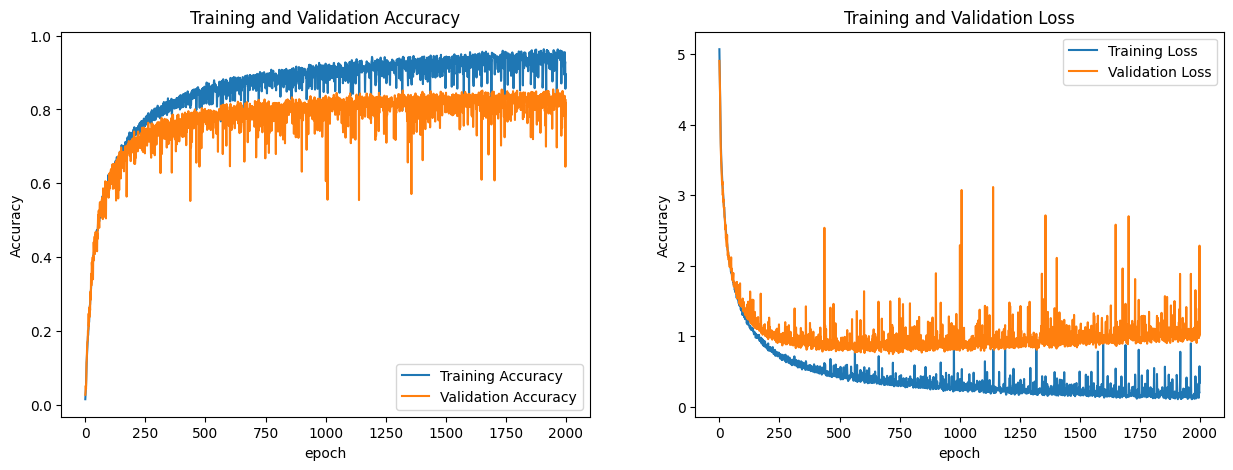

In [49]:
plot_history(history2,2000)

# Confusion matrix

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7d201bffbb50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7d201bffbb50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
98/98 [==============================] - 1s 2ms/step


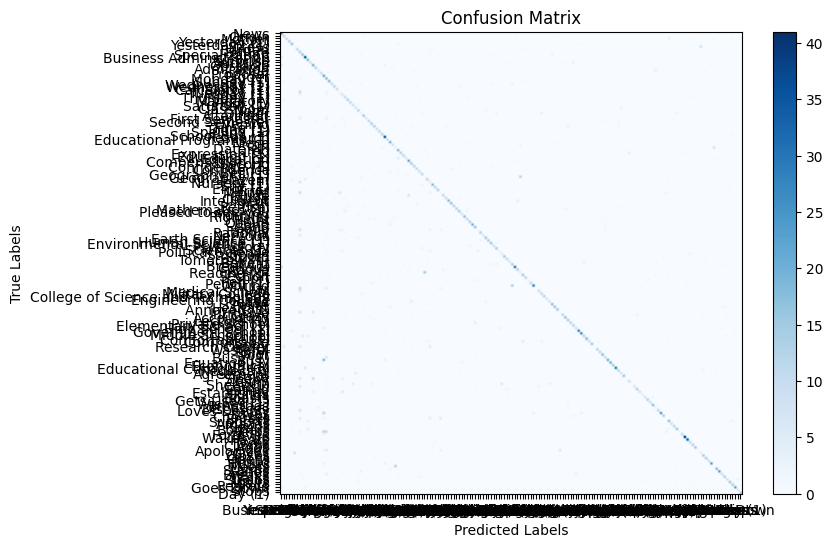

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a model and history object

# Get the predicted and true labels
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = y_test_encoded

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(conf_matrix)), labels=class_names)
plt.yticks(np.arange(len(conf_matrix)), labels=class_names)
plt.show()


In [51]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Precision: 0.7596
Recall: 0.7132


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# pancing the data set

## before

In [20]:
df.subfolder.value_counts()

Short             201
Reading (1)       201
Stupid            201
Medical School    201
Psychology        193
                 ... 
Yesterday2 (1)     58
Yesterday (1)      57
Specialization     57
Boasts             53
Sends              53
Name: subfolder, Length: 174, dtype: int64

In [21]:
label='subfolder'

g = df[['all_future','subfolder']].groupby(label, group_keys=False)
balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)
balanced_df.subfolder.value_counts()

Yesterday2 (1)    53
Above             53
Accounting        53
Active            53
Addition          53
                  ..
Annoyed (1)       53
Apologizes        53
Bell (1)          53
Benefit           53
Bigger            53
Name: subfolder, Length: 174, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
X=np.asarray(balanced_df['all_future'])
X = np.array(X.tolist())
X = X.reshape((X.shape[0], 1, X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, balanced_df['subfolder'], test_size=0.2, random_state=42)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target classes (y_train and y_test)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [26]:
num_classes = 174

model = Sequential()
model.add(GRU(256, return_sequences=True, input_shape=(1, 543)))
model.add(GRU(128 ))

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

filepath       = "/content/asl/Adam3/cp-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=700, batch_size=128,callbacks=callbacks_list)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 1, 256)            615168    
                                                                 
 gru_5 (GRU)                 (None, 128)               148224    
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 174)               44718     
                                                                 
Total params: 841134 (3.21 MB)
Trainable params: 841134 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/700
58/58 [==============================] - ETA: 0s - loss: 5.1466 - accuracy: 0.0070
Epoch 1: val_accuracy improved from -inf to 0.00867, sa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/58 [===========================>..] - ETA: 0s - loss: 4.9524 - accuracy: 0.0116
Epoch 2: val_accuracy improved from 0.00867 to 0.01301, saving model to /content/asl/Adam3/cp-02-0.01.hdf5
58/58 [==============================] - 0s 7ms/step - loss: 4.9510 - accuracy: 0.0114 - val_loss: 4.9147 - val_accuracy: 0.0130
Epoch 3/700
57/58 [============================>.] - ETA: 0s - loss: 4.8270 - accuracy: 0.0197
Epoch 3: val_accuracy improved from 0.01301 to 0.02222, saving model to /content/asl/Adam3/cp-03-0.02.hdf5
58/58 [==============================] - 0s 7ms/step - loss: 4.8273 - accuracy: 0.0199 - val_loss: 4.8031 - val_accuracy: 0.0222
Epoch 4/700
56/58 [===========================>..] - ETA: 0s - loss: 4.7011 - accuracy: 0.0286
Epoch 4: val_accuracy improved from 0.02222 to 0.02439, saving model to /content/asl/Adam3/cp-04-0.02.hdf5
58/58 [==============================] - 0s 8ms/step - loss: 4.6982 - accuracy: 0.0286 - val_loss: 4.6594 - val_accuracy: 0.0244
Epoch 5/700
58/58 [

i notice that is the downsampling method on the fututer dont improve the accuracy